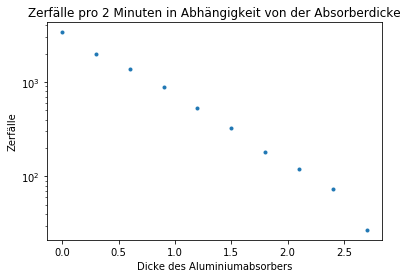

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy import optimize
n0_beta=112/2.5
n=np.array([852*4, 509*4, 351*4, 233*4, 577, 374, 228, 164, 118, 72])-n0_beta
dicke=np.linspace(0,2.7,len(n))
plt.plot(dicke, n, ".")
plt.xlabel("Dicke des Aluminiumabsorbers")
plt.ylabel("Zerfälle")
plt.yscale("log")
plt.title("Zerfälle pro 2 Minuten in Abhängigkeit von der Absorberdicke")
plt.show()

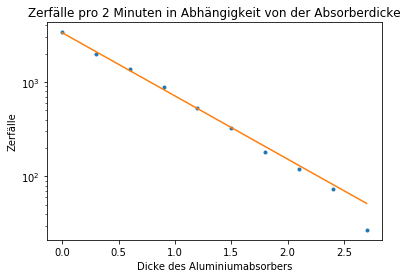

In [2]:
plt.plot(dicke, n, ".")
plt.xlabel("Dicke des Aluminiumabsorbers")
plt.ylabel("Zerfälle")
plt.yscale("log")
plt.title("Zerfälle pro 2 Minuten in Abhängigkeit von der Absorberdicke")

##Es ist zu erkennen, das außer dem letzten wert die Gerade quasi senkrecht ist
##Fitte daraus ein Funktion
fit_func= lambda x, a, l: a*np.exp(-l*x)
popt, pcov=optimize.curve_fit(fit_func, dicke[:-2], n[:-2], p0=[852*4, 2])
plt.plot(dicke, fit_func(dicke, *popt))
plt.show()

In [3]:
##Die Maximale Reichweite ist erreicht, wenn n<sqrt(n0), da dann n im bereich der Standardabweichung der Nullstrahlung liegt
func_zero=lambda x: fit_func(x, *popt)-n0_beta
max_len=optimize.broyden1(func_zero,4)##Findet nullstellen der gefitteten Funktion-sqrt(n0)
print("Maximale Dicke Absorber ß-Strahlung:", max_len)
##Fehlerbestimmung
raised_popt=np.array([popt[0]+sqrt(pcov[0][0]), popt[1]-sqrt(pcov[1][1])])#Funktionsparameter für höchste Funktion im Fehlerbereich
lowered_popt=np.array([popt[0]-sqrt(pcov[0][0]), popt[1]+sqrt(pcov[1][1])])#Funktionsparameter für niedrigste Funktion im Fehlerbereich
error_max_len=optimize.broyden1(lambda x: fit_func(x, *raised_popt)-np.sqrt(n0_beta), 4)-optimize.broyden1(lambda x: fit_func(x, *lowered_popt)-np.sqrt(n0_beta), 4)
##die differenz der nullstellen dieser Funktionen
print("Fehler:",error_max_len)

Maximale Dicke Absorber ß-Strahlung: 2.7959637918414515
Fehler: 0.2352846615082389


In [4]:
##Die Dichte von ALuminium beträgt 2.70 g/cm^3
R_beta=2.70*max_len+0.130
error_R_beta=2.70*error_max_len
print("Flächendichte:", R_beta, "±", error_R_beta, "g/cm²")

Flächendichte: 7.67910223797192 ± 0.6352685860722451 g/cm²


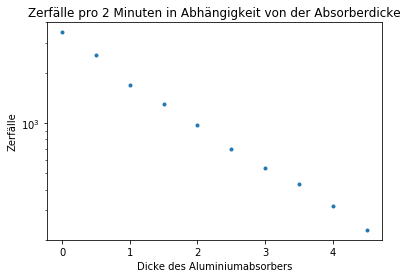

In [5]:
##Jetzt dasselbe nochmal für blei
n0=88/5
n_Blei=np.array([3510,2559,1714,1309,991,718,558,452,336,247])-n0
dicke=np.linspace(0,4.5,len(n_Blei))
plt.plot(dicke, n_Blei, ".")
plt.xlabel("Dicke des Aluminiumabsorbers")
plt.ylabel("Zerfälle")
plt.yscale("log")
plt.title("Zerfälle pro 2 Minuten in Abhängigkeit von der Absorberdicke")
plt.show()

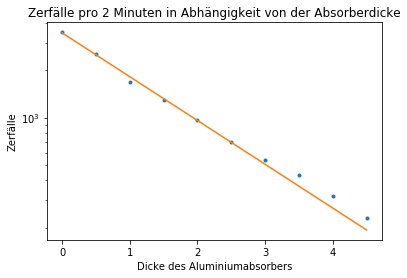

μ =  0.640537269592107 ± 0.016139678304360895
μ/p =  0.05648476804163201 ± 0.00142325205505828


In [6]:
plt.plot(dicke, n_Blei, ".")
plt.xlabel("Dicke des Aluminiumabsorbers")
plt.ylabel("Zerfälle")
plt.yscale("log")
plt.title("Zerfälle pro 2 Minuten in Abhängigkeit von der Absorberdicke")
popt_a, pcov_a=optimize.curve_fit(fit_func, dicke, n_Blei, p0=[3500, 5])
plt.plot(dicke, fit_func(dicke, *popt_a))
plt.show()
dichte_blei=11.34
print("μ = ", popt_a[1], "±", sqrt(pcov_a[1][1]))
print("μ/p = ", popt_a[1]/11.34, "±", sqrt(pcov_a[1][1])/11.34)


In [7]:
##Bestimmung der Aktivität
activity=lambda n,d,r=0.7, eps=0.04: 4*n/60*d**2/eps/r**2
activity_error=lambda n,d,dd=1,r=0.7,eps=0.04: activity(n,d,r,eps)*sqrt(1/n+(dd/d)**2)
activities=np.round(np.array([activity(26025, 5),activity(9388, 10),activity(2784, 20)]))
errors=np.round(np.array([activity_error(26025, 5),activity_error(9388, 10),activity_error(2784, 20)]))
for a,e,d in zip(activities, errors, [5,10,20]):
    print("Abstand", d,"cm: Aktivität", a,"+-",e, ",Relativfehler:",round(e/a*100,1),"%")

Abstand 5 cm: Aktivität 2213010.0 +- 442815.0 ,Relativfehler: 20.0 %
Abstand 10 cm: Aktivität 3193197.0 +- 321016.0 ,Relativfehler: 10.1 %
Abstand 20 cm: Aktivität 3787755.0 +- 202537.0 ,Relativfehler: 5.3 %


In [8]:
##Raumwinkelkorrektur
activity_corr1= lambda n,d,r=0.7,eps=0.04: 4*n/60*(d+2)**2/eps/r**2
activities_corr1=np.round(np.array([activity_corr1(26025, 5),activity_corr1(9388, 10),activity_corr1(2784, 20)]))
for a,e,d in zip(activities_corr1, errors, [5,10,20]):
    print("Raumwinkelkorrektur: Abstand", d,"cm: Aktivität", a,"+-",e, ",Relativfehler:",round(e/a*100,1),"%")

Raumwinkelkorrektur: Abstand 5 cm: Aktivität 4337500.0 +- 442815.0 ,Relativfehler: 10.2 %
Raumwinkelkorrektur: Abstand 10 cm: Aktivität 4598204.0 +- 321016.0 ,Relativfehler: 7.0 %
Raumwinkelkorrektur: Abstand 20 cm: Aktivität 4583184.0 +- 202537.0 ,Relativfehler: 4.4 %


In [9]:
##Absorptionskorrektur
k=np.exp(-0.056*7.9*0.14)
activities_corr2=activities_corr1*k
for a,e,d in zip(activities_corr2, errors, [5,10,20]):
    print("Absorptionskorrektur: Abstand", d,"cm: Aktivität", a,"+-",e, ",Relativfehler:",round(e/a*100,1),"%")

Absorptionskorrektur: Abstand 5 cm: Aktivität 4077002.9412950673 +- 442815.0 ,Relativfehler: 10.9 %
Absorptionskorrektur: Abstand 10 cm: Aktivität 4322049.851913486 +- 321016.0 ,Relativfehler: 7.4 %
Absorptionskorrektur: Abstand 20 cm: Aktivität 4307931.90743435 +- 202537.0 ,Relativfehler: 4.7 %


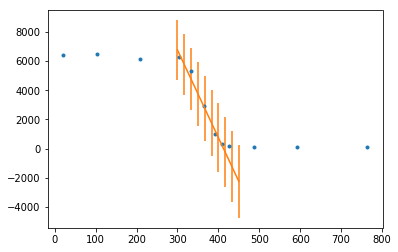

In [10]:
##Absorption von alpha-Strahlung
n_alpha=np.array([6383,6474,6171,6249,5319,2897,968,330,192,97,122,85])
druck_alpha=np.array([20,104,209,303,332,365,392,408,426,487,592,764])
plt.plot(druck_alpha, n_alpha, ".")
(slope, intercept), cov=np.polyfit(druck_alpha[3:8], n_alpha[3:8], 1, cov=True)
plt.errorbar(np.linspace(300, 450, 10), np.linspace(300, 450,10)*slope+intercept, np.sqrt(cov[0,0]*np.linspace(300,450,10)**2+cov[1,1]))
plt.show()

In [11]:
##Bestimmen der Rechweite
p_normal=1013
s=lambda p, d: p/p_normal*d
n50=np.average(n_alpha[:4])/2
x=(n50-intercept)/slope
dx=x*sqrt(cov[0][0]/slope**2+cov[1][1]/intercept**2)
print(n50)
print(x,"+-",dx)

3159.625
359.88309183369984 +- 34.55072832263525


In [14]:
##3237 liegt zwischen 5319 und 2897. diese liegen bei 332 und 365 mbar
##berechne linearen schnittpunkt
p50=(332*np.abs((n50-5319)/(5319-2897))+np.abs((n50-2897)/(5319-2897))*365)
print("Mittlere Druck:",x)
##Fehler kann grob abgeschätzt werden auf p*sqrt(1/n1+1/n2)
print("Fehler:", x*np.sqrt(1/5319+ 1/2897))
s1=s(x,3.95)
print("S1:",x)


Mittlere Druck: 359.88309183369984
Fehler: 8.310026629302438
S1: 359.88309183369984


In [13]:
##Korrektur der Rechweite
s2=s1+2.85/1.43
print("S2:",s2)
s3=s2+0.68
print("S3:",s3)

S2: 3.3963023659024665
S3: 4.076302365902467
